In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Eval transformation functions

def most_common(lst): 
    return max(set(lst), key = lst.count)

def reveal_bias(url):
    path = url.split('/', 1)[1]
    apps = re.sub('[/-]', ' ',path).split()[:-1]
    return most_common(apps)

def add_bias_labels(col_lst):
    for i in range(len(col_lst)):
        col_lst[i] = col_lst[i] + "-bias-" + reveal_bias(col_lst[i])
    return col_lst

In [3]:
ex_16_df = pd.read_parquet("./Auto-scaling-results/final_ex/ex-16/ex-16.parquet")
ex_26_df = pd.read_parquet("./Auto-scaling-results/final_ex/ex-26/ex-26.parquet")
ex_36_df = pd.read_parquet("./Auto-scaling-results/final_ex/ex-36/ex-36.parquet")
ex_46_df = pd.read_parquet("./Auto-scaling-results/final_ex/ex-46/ex-46.parquet")

In [37]:
ex_16_df

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers,bias_2,bias_3,bias_4
0,0.037,218,200,/3/3-3-2-2/115,2019-09-24 13:37:08,6,3,3,3,False,True,False
1,0.318,198,200,/2/3-4/232,2019-09-24 13:37:08,6,3,3,3,False,False,True
2,0.308,198,200,/3/3-4/37,2019-09-24 13:37:08,6,3,3,3,False,True,False
3,0.014,198,200,/3/4-3/42,2019-09-24 13:37:08,6,3,3,3,False,True,False
4,0.293,188,200,/4/4/223,2019-09-24 13:37:08,6,3,3,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
71794,44.029,0,499,/3/2-3-2-2/204,2019-09-24 14:07:07,6,3,3,3,True,False,False
71795,7.508,0,499,/4/3-3-3-3-3/181,2019-09-24 14:07:07,6,3,3,3,False,True,False
71796,11.226,0,499,/3/2-3-3-2/107,2019-09-24 14:07:07,6,3,3,3,False,True,False
71797,5.565,0,499,/3/2-3-2-2/212,2019-09-24 14:07:07,6,3,3,3,True,False,False


In [5]:
ex_16_df.resp_time = ex_16_df.resp_time.astype(float)
ex_26_df.resp_time = ex_26_df.resp_time.astype(float)
ex_36_df.resp_time = ex_36_df.resp_time.astype(float)
ex_46_df.resp_time = ex_46_df.resp_time.astype(float)

In [6]:
'''
ex_1_df = pd.get_dummies(ex_1_df, columns = ['url'])
ex_2_df = pd.get_dummies(ex_2_df, columns = ['url'])
'''

"\nex_1_df = pd.get_dummies(ex_1_df, columns = ['url'])\nex_2_df = pd.get_dummies(ex_2_df, columns = ['url'])\n"

In [7]:
ex_16_df.resp_time.mean()

8.568028180286436

In [8]:
ex_26_df.resp_time.mean()

8.60464958322205

In [9]:
ex_36_df.resp_time.mean()

8.400398910889717

In [10]:
ex_46_df.resp_time.mean()

8.363470390783638

In [11]:
url_features = ex_16_df.url.unique().tolist()

In [12]:
bias_lst = add_bias_labels(url_features)

In [22]:
bias_2 = [x[:-7] for x in bias_lst if "bias-2" in x]
bias_3 = [x[:-7] for x in bias_lst if "bias-3" in x]
bias_4 = [x[:-7] for x in bias_lst if "bias-4" in x]

In [23]:
def is_bias(url, lst):
    if url in lst:
        return True
    else:
        return False

In [24]:
bias_2

['/2/4-2-2-3-2/204',
 '/2/4-2-4-2/65',
 '/2/2-2-2-4-4/72',
 '/2/4-3-2-2-2/85',
 '/2/2/130',
 '/3/2/158',
 '/2/2-2-2-3-2/197',
 '/2/4-3-2-2-2/105',
 '/2/3-3-2/245',
 '/3/3-2-2-2-2/197',
 '/2/2-2-3-2/126',
 '/2/2-3-2-2-3/104',
 '/2/2-2/6',
 '/2/3/188',
 '/3/4-2-2/38',
 '/2/2/247',
 '/3/4-2-2/96',
 '/3/2-3-2-2/204',
 '/4/2-4-2-2/75',
 '/2/3-2-3-4-2/94',
 '/2/2-2-4/199',
 '/3/3-2-2-2/137',
 '/2/2-2/95',
 '/2/2-3/104',
 '/3/2-3-2-2/212',
 '/2/3/6',
 '/2/3-2-3/93',
 '/2/3-4-2-3/152',
 '/3/3-2-2/77',
 '/3/2-2-3/49',
 '/2/2/57',
 '/2/2/119']

In [25]:
for df in [ex_16_df, ex_26_df, ex_36_df, ex_46_df]:
    df["bias_2"] = df["url"].apply(lambda x: is_bias(x, bias_2))
    df["bias_3"] = df["url"].apply(lambda x: is_bias(x, bias_3))
    df["bias_4"] = df["url"].apply(lambda x: is_bias(x, bias_4))

In [26]:
ex_16_df

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers,bias_2,bias_3,bias_4
0,0.037,218,200,/3/3-3-2-2/115,2019-09-24 13:37:08,6,3,3,3,False,True,False
1,0.318,198,200,/2/3-4/232,2019-09-24 13:37:08,6,3,3,3,False,False,True
2,0.308,198,200,/3/3-4/37,2019-09-24 13:37:08,6,3,3,3,False,True,False
3,0.014,198,200,/3/4-3/42,2019-09-24 13:37:08,6,3,3,3,False,True,False
4,0.293,188,200,/4/4/223,2019-09-24 13:37:08,6,3,3,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
71794,44.029,0,499,/3/2-3-2-2/204,2019-09-24 14:07:07,6,3,3,3,True,False,False
71795,7.508,0,499,/4/3-3-3-3-3/181,2019-09-24 14:07:07,6,3,3,3,False,True,False
71796,11.226,0,499,/3/2-3-3-2/107,2019-09-24 14:07:07,6,3,3,3,False,True,False
71797,5.565,0,499,/3/2-3-2-2/212,2019-09-24 14:07:07,6,3,3,3,True,False,False


'\nex_16_df[ex_16_df["bias_2"] == True].resp_time.hist()\n\nex_16_df[ex_16_df["bias_3"] == True].resp_time.hist()\n\nex_16_df[ex_16_df["bias_4"] == True].resp_time.hist()\n'

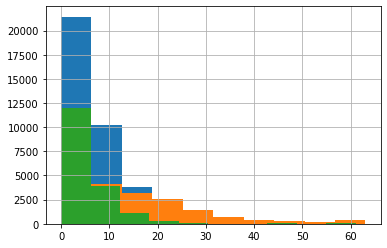

In [33]:
ex_16_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

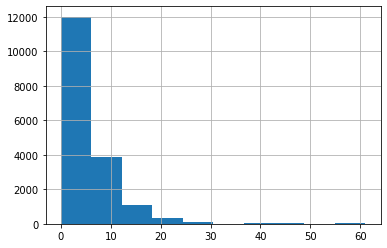

In [29]:
ex_16_df[ex_16_df["bias_2"] == True].resp_time.hist()

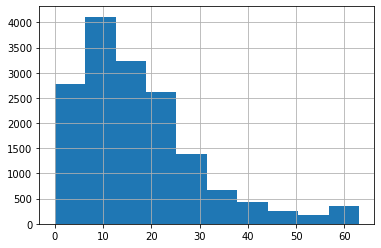

In [30]:
ex_16_df[ex_16_df["bias_3"] == True].resp_time.hist()

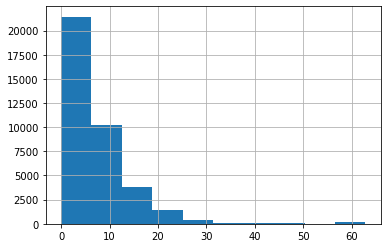

In [31]:
ex_16_df[ex_16_df["bias_4"] == True].resp_time.hist()

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

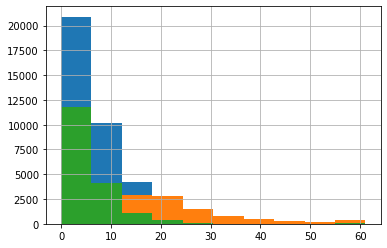

In [34]:
ex_26_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

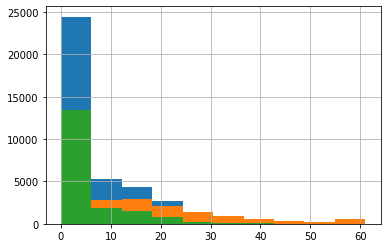

In [35]:
ex_36_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

bias_2  bias_3  bias_4
False   False   True      AxesSubplot(0.125,0.125;0.775x0.755)
        True    False     AxesSubplot(0.125,0.125;0.775x0.755)
True    False   False     AxesSubplot(0.125,0.125;0.775x0.755)
Name: resp_time, dtype: object

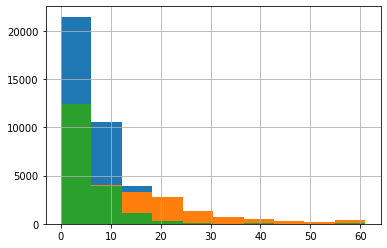

In [36]:
ex_46_df.groupby(["bias_2", "bias_3", "bias_4"]).resp_time.hist()

In [38]:
# Error rate

In [39]:
ex_16_df

,resp_time,bytes_sent,resp_code,url,datetime,app_1_containers,app_2_containers,app_3_containers,app_4_containers,bias_2,bias_3,bias_4
0,0.037,218,200,/3/3-3-2-2/115,2019-09-24 13:37:08,6,3,3,3,False,True,False
1,0.318,198,200,/2/3-4/232,2019-09-24 13:37:08,6,3,3,3,False,False,True
2,0.308,198,200,/3/3-4/37,2019-09-24 13:37:08,6,3,3,3,False,True,False
3,0.014,198,200,/3/4-3/42,2019-09-24 13:37:08,6,3,3,3,False,True,False
4,0.293,188,200,/4/4/223,2019-09-24 13:37:08,6,3,3,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
71794,44.029,0,499,/3/2-3-2-2/204,2019-09-24 14:07:07,6,3,3,3,True,False,False
71795,7.508,0,499,/4/3-3-3-3-3/181,2019-09-24 14:07:07,6,3,3,3,False,True,False
71796,11.226,0,499,/3/2-3-3-2/107,2019-09-24 14:07:07,6,3,3,3,False,True,False
71797,5.565,0,499,/3/2-3-2-2/212,2019-09-24 14:07:07,6,3,3,3,True,False,False


In [40]:
ex_16_df.resp_code.value_counts()

200    70289
110      579
504      579
499      352
Name: resp_code, dtype: int64

In [41]:
ex_26_df.resp_code.value_counts()

200    70299
110      491
504      491
499      351
Name: resp_code, dtype: int64

In [42]:
ex_36_df.resp_code.value_counts()

200    71369
110      472
504      472
499      328
Name: resp_code, dtype: int64

In [43]:
ex_46_df.resp_code.value_counts()

200    71439
110      611
504      611
499      343
Name: resp_code, dtype: int64